# Simulation impot concubains avec enfants biologiques.

In [2]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2019-04-26 18:29:02.966000


In [3]:
year = 2013

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import pickle
import statsmodels.api as sm
import sys

In [7]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import pickle
import statsmodels.api as sm
import sys

In [8]:
#Store = pd.HDFStore(store_path)

In [9]:
def load_fisc_i_by_year(year = None):
    df_fisci = pd.read_hdf(store_path, 'FISC_INDIVIDU_{}'.format(year))
    return df_fisci
def load_fisc_r_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_REVENU_{}'.format(year))
    return df_fiscr
def load_fisc_l_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_LOGEMENT_{}'.format(year))
    return df_fiscr

def load_df_fiscrevdet_by_year(year = None):
    df_fiscrevdet = pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year))
    return df_fiscrevdet
    

In [10]:
diploma_labels = {1:"No_school", 2 : "primary_middle_school",11:"CEP", 12:"BEPC", 13:"CAP", 14:"BEP", 15:"BAC", 16:"Bac_pro",17:"Bac_plus_3",18:"Master_PhD" }
diploma_labels_homme = {1:"No_school_man", 2 : "primary_middle_school_man",11:"CEP_man", 12:"BEPC_man", 13:"CAP_man", 14:"BEP_man", 15:"BAC_man", 16:"Bac_pro_man",17:"Bac_plus_3_man",18:"Master_PhD_man" }
diploma_labels_femme = {1:"No_school_wo", 2 : "primary_middle_school_wo",11:"CEP_wo", 12:"BEPC_wo", 13:"CAP_wo", 14:"BEP_wo", 15:"BAC_wo", 16:"Bac_pro_wo",17:"Bac_plus_3_wo",18:"Master_PhD_wo" }


def add_diplomas_dummies(df_temp):
    df_temp.loc[df_temp.Diplome_femme == 3, "Diplome_femme"] = 2
    df_temp.loc[df_temp.Diplome_homme == 3, "Diplome_homme"] = 2
    df_temp.loc[df_temp.Diplome_femme == 19, "Diplome_femme"] = 18
    df_temp.loc[df_temp.Diplome_homme == 3, "Diplome_homme"] = 18
    diplome_homme = pd.get_dummies(df_temp.Diplome_homme)
    diplome_femme = pd.get_dummies(df_temp.Diplome_femme)
    diplome_homme = diplome_homme.rename(columns=diploma_labels_homme)
    diplome_femme = diplome_femme.rename(columns=diploma_labels_femme)
    df_temp = pd.concat([df_temp, diplome_homme], axis = 1)
    df_temp = pd.concat([df_temp, diplome_femme], axis = 1)
    
    df_temp["No_education_femme"] = df_temp.Diplome_femme.isin([1,2,11,12])
    df_temp["No_education_homme"] = df_temp.Diplome_homme.isin([1,2,11,12])
    
    df_temp["Vocational_education_femme"] = df_temp.Diplome_femme.isin([13,14,15,16])
    df_temp["Vocational_education_homme"] = df_temp.Diplome_homme.isin([13,14,15,16])
    
    df_temp["Licence_education_femme"] = df_temp.Diplome_femme.isin([17])
    df_temp["Licence_education_homme"] = df_temp.Diplome_homme.isin([17])

    df_temp["Master_PhD_education_femme"] = df_temp.Diplome_femme.isin([18])
    df_temp["Master_PhD_education_homme"] = df_temp.Diplome_homme.isin([18])
    
    
    
    return df_temp

In [11]:
hdf_path = ("./Generated_hdf/optimizers.h5")

In [12]:
biologic_path = (u"./Pickle/biologic/biologic_households{}.p".format(2013))
biologic_2013 = pickle.load( 
        open(biologic_path, 'rb'))

In [13]:
biologic_path = (u"./Pickle/biologic/biologic_households{}.p".format(2014))
biologic_2014 = pickle.load( 
        open(biologic_path, 'rb'))

In [14]:
hdf_for_exploitation_path = ("./Generated_hdf/data_to_exploit.h5")

In [15]:
%%time
for key in ["df2013_A","df2013_B", "df2013_C" ,  "df2013_D", 
            "df2014_A","df2014_B", "df2014_C","df2014_D", 
            "df_concat_A", "df_concat_B","df_concat_C","df_concat_D",
            "df_A", "df_B", "df_C","df_D",]:
    globals()[key] = pd.read_hdf(hdf_for_exploitation_path, key)

Wall time: 2.36 s


In [16]:
diploma_4_categories = ["No_education_femme", "Vocational_education_femme","Licence_education_femme", "Master_PhD_education_femme",
                       "No_education_homme", "Vocational_education_homme","Licence_education_homme", "Master_PhD_education_homme"]
diploma_4_categories_to_regress =  ["Vocational_education_femme","Licence_education_femme", "Master_PhD_education_femme",
                       "Vocational_education_homme","Licence_education_homme", "Master_PhD_education_homme"]

In [17]:
df2013_B.Separation.value_counts()

False    45507
True       939
dtype: int64

In [18]:
df2013_B.shape

(46446, 229)

In [19]:
df_B.shape

(32272, 422)

In [20]:
df2014_B.shape

(45873, 180)

In [21]:
df_B["Fiscal_max_potential_loss_2013"] = df_B.result_min_allocation_2013 - df_B.result_max_allocation_2013
hello_2013 = df_B.Fiscal_loss_2013/df_B.Fiscal_max_potential_loss_2013

df_B["Fiscal_max_potential_loss_2014"] = df_B.result_min_allocation_2014 - df_B.result_max_allocation_2014
hello_2014 = df_B.Fiscal_loss_2014/df_B.Fiscal_max_potential_loss_2014

## Create diplomas dataset

In [22]:
diploma_4_categories_2013 = [a + "_2013" for a in diploma_4_categories]
for key in ["df2013_A","df2013_B", "df2013_C", "df2013_D",
            "df2014_A","df2014_B", "df2014_C","df2014_D", 
            "df_concat_A", "df_concat_B","df_concat_C","df_concat_D",
            "df_A", "df_B", "df_C", "df_D"]:
    

    
    
    
    df_temp = globals()[key]
    try:
        df_temp = df_temp[df_temp[diploma_4_categories].sum(axis = 1) == 2]
        globals()[key+"_diplomas"] = df_temp
    except KeyError: #Deal with diplomas variable having the year in the end of the name
        try: 
            df_temp = df_temp[df_temp[diploma_4_categories_2013].sum(axis = 1) == 2]
            globals()[key+"_diplomas"] = df_temp
        except: Boum

    

## Same oportunity set

In [23]:
print df_B.query("Nb_enfants_2013 == Nb_enfants_2014 ").shape
print df_B.query("Nb_enfants_2013 != Nb_enfants_2014 ").shape

(28997, 424)
(3275, 424)


In [24]:
df_B.query("Nb_enfants_2013 != Nb_enfants_2014 ").shape[0]/df_B.shape[0]

0.10148116013882003

In [25]:
df_B.query("Nb_enfants_2013 < Nb_enfants_2014 ").shape[0]/df_B.shape[0]

0.0913795240456123

### Number of optimal allocations

In [26]:
(df_B.Number_of_optimal_allocations_2013==df_B.Number_of_optimal_allocations_2014).value_counts(normalize = True)

True     0.881197
False    0.118803
dtype: float64

In [27]:
print df_B.Number_of_optimal_allocations_2013.value_counts(normalize = True)
print df_B.Number_of_optimal_allocations_2014.value_counts(normalize = True)

1     0.951878
2     0.039725
3     0.005980
4     0.001952
5     0.000310
6     0.000093
12    0.000062
dtype: float64
1    0.867253
2    0.108174
3    0.017724
4    0.005485
5    0.000899
6    0.000403
8    0.000062
dtype: float64


In [28]:
((df_B.Number_of_optimal_allocations_2013 == 1)&
    (df_B.Number_of_optimal_allocations_2013==df_B.Number_of_optimal_allocations_2014)).value_counts(normalize = True)

True     0.856718
False    0.143282
dtype: float64

### Stat des sur les transitions

In [29]:
print df_B.Family_child_gain.value_counts(normalize = True)
print df_B.Family_child_loss.value_counts(normalize = True)

False    0.90862
True     0.09138
dtype: float64
False    0.989898
True     0.010102
dtype: float64


In [30]:
df_B.Same_optimal_allocation_same_family.value_counts()

1     23001
0      8227
2       851
3       145
4        32
5        10
64        4
6         2
dtype: int64

In [31]:

df_temp = df_B.query("Nb_enfants_2013 == Nb_enfants_2014 ")
pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
            df_temp.Same_optimal_allocation_same_family.astype("bool"))/df_temp.shape[0]

Same_optimal_allocation_same_family,False,True
Same_family_did_not_change_allocation,,
False,0.023416,0.031762
True,0.147360,0.797462


In [32]:

df_temp = df_B.query("Nb_enfants_2013 == Nb_enfants_2014 ")


In [33]:
pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
           columns =  [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_0_1_prct_income_share_2013])/df_temp.shape[0]

Same_optimal_allocation_same_family            False               True   \
Do_not_optimize_0_1_prct_income_share_2013     False     True      False   
Same_family_did_not_change_allocation                                      
False                                       0.019692  0.003725  0.015312   
True                                        0.087975  0.059385  0.630065   

Same_optimal_allocation_same_family                   
Do_not_optimize_0_1_prct_income_share_2013     True   
Same_family_did_not_change_allocation                 
False                                       0.016450  
True                                        0.167397

In [34]:
pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
           columns =  [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_0_1_prct_income_share_2013])/df_temp.shape[0]

Same_optimal_allocation_same_family            False               True   \
Do_not_optimize_0_1_prct_income_share_2013     False     True      False   
Same_family_did_not_change_allocation                                      
False                                       0.019692  0.003725  0.015312   
True                                        0.087975  0.059385  0.630065   

Same_optimal_allocation_same_family                   
Do_not_optimize_0_1_prct_income_share_2013     True   
Same_family_did_not_change_allocation                 
False                                       0.016450  
True                                        0.167397

In [35]:
df_temp = df_B.query("(Same_optimal_allocation_same_family==1) & (Nb_enfants_2013>=1) ")
crosstab = pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
            [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014],
           margins = True) ; crosstab

Same_optimal_allocation_same_family     True                     All
Do_not_optimize_2013                   False       True             
Do_not_optimize_2014                   False True False  True       
Same_family_did_not_change_allocation                               
False                                     67  291   482    43    883
True                                   16781   78   473  4786  22118
All                                    16848  369   955  4829  23001

In [36]:
# df_temp.query('(Do_not_optimize_2013==False)&(Do_not_optimize_2014==False)&(Same_family_did_not_change_allocation==False)'
#             )

In [37]:
df_temp = df_B.query("(Same_optimal_allocation_same_family==1) & (Nb_enfants_2013>=1) ")
crosstab = pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
            [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014],
           margins = True) ; crosstab

Same_optimal_allocation_same_family     True                     All
Do_not_optimize_2013                   False       True             
Do_not_optimize_2014                   False True False  True       
Same_family_did_not_change_allocation                               
False                                     67  291   482    43    883
True                                   16781   78   473  4786  22118
All                                    16848  369   955  4829  23001

### On garde que les ménages qui ont une seul allocation optimale en 2013 et 2014

In [38]:
df_temp = df_B.query("(Same_optimal_allocation_same_family==1) & (Nb_enfants_2013>=1)"
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)  ")
crosstab = pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
            [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014],
           margins = True) ; crosstab

Same_optimal_allocation_same_family     True                     All
Do_not_optimize_2013                   False       True             
Do_not_optimize_2014                   False True False  True       
Same_family_did_not_change_allocation                               
False                                      0  273   432    40    745
True                                   15220    0     0  4634  19854
All                                    15220  273   432  4674  20599

In [39]:
df_temp = df_B.query("(Same_optimal_allocation_same_family==1) & (Nb_enfants_2013>=1)"
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)  ")
crosstab = pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
            [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_1_prct_income_share_2013,
             df_temp.Do_not_optimize_1_prct_income_share_2014],
           margins = True) ; crosstab

Same_optimal_allocation_same_family        True                      All
Do_not_optimize_1_prct_income_share_2013  False        True             
Do_not_optimize_1_prct_income_share_2014  False  True False  True       
Same_family_did_not_change_allocation                                   
False                                       397   137   195    16    745
True                                      17312   957   308  1277  19854
All                                       17709  1094   503  1293  20599

In [40]:
(df_temp.Optimal_allocations_2013 == df_temp.Optimal_allocations_2014).value_counts()

True    20599
dtype: int64

In [41]:
df_A.Number_of_optimal_allocations_2013.value_counts(dropna=False)

1     32081
2      3845
3      1761
4       342
5       171
6        22
7        21
36        4
12        2
dtype: int64

In [42]:
df_A.Number_of_optimal_allocations_2014.value_counts(dropna=False)

1     28582
2      6017
3      2678
4       623
5       274
7        38
6        31
36        4
8         2
dtype: int64

Parmis les gens qui n'optimisent  pas 1% du reven en 2013 quasi-personne  a changé d'allocation pour ne pas optimiser en 2014 (no-bad switchers, 1% des non optimisateurs 2013, 1.4% des non optimisateurs 2013 et 2014 ).  
Parmis les gens qui se sont mis à optimiser à 1% du rev, 69% n'ont pas changé d'allocation, et 31% ont changé d'allocation.  

On a 91% des gens qui se sont mis à optimiser et qui ont changé d'allocation qui l'ont fait pour une meilleure allocation et 9% qui ont changé pour une allocation qui n'est toujours pas la bonne. Il faut garder en tête que pour les couples de 1 enfant, si l'on fait l'hytpothèse que les revenus et le système fiscal ne change pas,  puisqu'il n'y a que 2 allocations optimales possibles, 100% des non optimisateurs 2013 qui changent en 2014 tombent sur l'allocation optimale.


Les inertes chanceux : Ne changent pas d'allocations, mais se mettent à optimiser. Les inertes chanceux représentent 69% des gens qui se mettent à optimiser, contre 31% des gens qui changent activement pour se mettre à optimiser.



Conclusion : seul 3.8% du sample change d'allocation optimale. Parmis ces 3.8% de switchers:  
- 

In [43]:
847/22146

0.038246184412534995

In [44]:
200/644

0.3105590062111801

In [45]:
df_B["Switchers"] =((df_B.Nb_enfants_2013>=1)&(df_B.Nb_enfants_2013==df_B.Nb_enfants_2014) 
                     &(df_B.Number_of_optimal_allocations_2013 == 1)&(df_B.Number_of_optimal_allocations_2014 == 1)&
                   (df_B.Chosen_allocation_2013 != df_B.Chosen_allocation_2014))
df_B_diplomas["Switchers"] =((df_B_diplomas.Nb_enfants_2013>=1)&(df_B_diplomas.Nb_enfants_2013==df_B_diplomas.Nb_enfants_2014) 
                     &(df_B_diplomas.Number_of_optimal_allocations_2013 == 1)&(df_B_diplomas.Number_of_optimal_allocations_2014 == 1)&
                   (df_B_diplomas.Chosen_allocation_2013 != df_B_diplomas.Chosen_allocation_2014))


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
df_B["Non_switchers"] =((df_B.Nb_enfants_2013>=1)&(df_B.Nb_enfants_2013==df_B.Nb_enfants_2014) 
                     &(df_B.Number_of_optimal_allocations_2013 == 1)&(df_B.Number_of_optimal_allocations_2014 == 1))
df_B_diplomas["Non_switchers"] =((df_B_diplomas.Nb_enfants_2013>=1)&(df_B_diplomas.Nb_enfants_2013==df_B_diplomas.Nb_enfants_2014) 
                     &(df_B_diplomas.Number_of_optimal_allocations_2013 == 1)&(df_B_diplomas.Number_of_optimal_allocations_2014 == 1))


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Switchers, margins = True) ; crosstab

Switchers                                                                      False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family          
False                False                False                                    0   
                                          True                                 15220   
                     True                 False                                 1987   
                                          True                                     0   
True                 False                False                                 1883   
                                          True                                     0   
                     True                 False                                  285   
                                          True                                  4634   
All                                                                            24009   

Switchers                                                                      True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                 504   
                                          True                                    0   
                     True                 False                                  23   
                                          True                                  273   
True                 False                False                                  33   
                                          True                                  432   
                     True                 False                                  93   
                                          True                                   40   
All                                                                            1398   

Switchers                                                                        All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                  504  
                                          True                                 15220  
                     True                 False                                 2010  
                                          True                                   273  
True                 False                False                                 1916  
                                          True                                   432  
                     True                 False                                  378  
                                          True                                  4674  
All                                                                            25407

In [48]:
df_temp_diplomas = df_B_diplomas.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab_diplomas = pd.crosstab( [ df_temp_diplomas.Do_not_optimize_2013, df_temp_diplomas.Do_not_optimize_2014, df_temp_diplomas.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp_diplomas.Switchers, margins = True) ; crosstab_diplomas

Switchers                                                                      False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family          
False                False                False                                    0   
                                          True                                 10323   
                     True                 False                                 1373   
                                          True                                     0   
True                 False                False                                 1274   
                                          True                                     0   
                     True                 False                                  204   
                                          True                                  3196   
All                                                                            16370   

Switchers                                                                      True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                 333   
                                          True                                    0   
                     True                 False                                  15   
                                          True                                  184   
True                 False                False                                  22   
                                          True                                  268   
                     True                 False                                  62   
                                          True                                   31   
All                                                                             915   

Switchers                                                                        All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                  333  
                                          True                                 10323  
                     True                 False                                 1388  
                                          True                                   184  
True                 False                False                                 1296  
                                          True                                   268  
                     True                 False                                  266  
                                          True                                  3227  
All                                                                            17285

Simplified withouth the switcher dimension.

In [49]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Do_not_optimize_2014, margins = True, values = df_B.Fiscal_loss_2014, aggfunc = np.mean ) ; crosstab

Do_not_optimize_2014                                      False        True  \
Do_not_optimize_2013 Same_optimal_allocation_same_family                      
False                False                                    0  297.549493   
                     True                                     0  460.374359   
True                 False                                    0  546.023545   
                     True                                     0  521.426192   
All                                                           0  459.072883   

Do_not_optimize_2014                                             All  
Do_not_optimize_2013 Same_optimal_allocation_same_family              
False                False                                237.897566  
                     True                                   8.112193  
True                 False                                 89.972493  
                     True                                 477.310227  
All                                                       127.114457

Average

In [50]:
crosstab/len(df_temp)

Do_not_optimize_2014                                      False      True  \
Do_not_optimize_2013 Same_optimal_allocation_same_family                    
False                False                                    0  0.011711   
                     True                                     0  0.018120   
True                 False                                    0  0.021491   
                     True                                     0  0.020523   
All                                                           0  0.018069   

Do_not_optimize_2014                                           All  
Do_not_optimize_2013 Same_optimal_allocation_same_family            
False                False                                0.009363  
                     True                                 0.000319  
True                 False                                0.003541  
                     True                                 0.018787  
All                                                       0.005003

In [51]:
crosstab_diplomas/len(df_temp_diplomas)

Switchers                                                                         False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family             
False                False                False                                0.000000   
                                          True                                 0.597223   
                     True                 False                                0.079433   
                                          True                                 0.000000   
True                 False                False                                0.073706   
                                          True                                 0.000000   
                     True                 False                                0.011802   
                                          True                                 0.184900   
All                                                                            0.947064   

Switchers                                                                          True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family             
False                False                False                                0.019265   
                                          True                                 0.000000   
                     True                 False                                0.000868   
                                          True                                 0.010645   
True                 False                False                                0.001273   
                                          True                                 0.015505   
                     True                 False                                0.003587   
                                          True                                 0.001793   
All                                                                            0.052936   

Switchers                                                                           All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family            
False                False                False                                0.019265  
                                          True                                 0.597223  
                     True                 False                                0.080301  
                                          True                                 0.010645  
True                 False                False                                0.074978  
                                          True                                 0.015505  
                     True                 False                                0.015389  
                                          True                                 0.186694  
All                                                                            1.000000

In [52]:
from IPython.display import display

In [53]:
for child in range(1,6):
    df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
    df_temp = df_temp.query("Nb_enfants_2013 == {}".format(child))
    crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                           df_temp.Switchers, margins = True) ; 
    print("{} children".format(child))
    display(crosstab)

1 children


Switchers                                                                      False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family          
False                False                False                                    0   
                                          True                                  9128   
                     True                 False                                 1025   
                                          True                                     0   
True                 False                False                                 1084   
                                          True                                     0   
                     True                 False                                    0   
                                          True                                  2353   
All                                                                            13590   

Switchers                                                                      True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                 248   
                                          True                                    0   
                     True                 False                                   0   
                                          True                                  149   
True                 False                False                                   0   
                                          True                                  224   
                     True                 False                                  37   
                                          True                                    0   
All                                                                             658   

Switchers                                                                        All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                  248  
                                          True                                  9128  
                     True                 False                                 1025  
                                          True                                   149  
True                 False                False                                 1084  
                                          True                                   224  
                     True                 False                                   37  
                                          True                                  2353  
All                                                                            14248

2 children


Switchers                                                                      False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family          
False                False                False                                    0   
                                          True                                  5613   
                     True                 False                                  918   
                                          True                                     0   
True                 False                False                                  765   
                                          True                                     0   
                     True                 False                                  262   
                                          True                                  2098   
All                                                                             9656   

Switchers                                                                      True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                 234   
                                          True                                    0   
                     True                 False                                  20   
                                          True                                  116   
True                 False                False                                  30   
                                          True                                  189   
                     True                 False                                  50   
                                          True                                   35   
All                                                                             674   

Switchers                                                                        All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                  234  
                                          True                                  5613  
                     True                 False                                  938  
                                          True                                   116  
True                 False                False                                  795  
                                          True                                   189  
                     True                 False                                  312  
                                          True                                  2133  
All                                                                            10330

3 children


Switchers                                                                      False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family          
False                False                False                                    0   
                                          True                                   463   
                     True                 False                                   42   
                                          True                                     0   
True                 False                False                                   32   
                                          True                                     0   
                     True                 False                                   12   
                                          True                                   131   
All                                                                              680   

Switchers                                                                      True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                  21   
                                          True                                    0   
                     True                 False                                   2   
                                          True                                    8   
True                 False                False                                   3   
                                          True                                   19   
                     True                 False                                   5   
                                          True                                    5   
All                                                                              63   

Switchers                                                                      All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family       
False                False                False                                 21  
                                          True                                 463  
                     True                 False                                 44  
                                          True                                   8  
True                 False                False                                 35  
                                          True                                  19  
                     True                 False                                 17  
                                          True                                 136  
All                                                                            743

4 children


Switchers                                                                      False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family          
False                False                False                                    0   
                                          True                                    15   
                     True                 False                                    2   
True                 False                False                                    2   
                     True                 False                                   11   
                                          True                                    52   
All                                                                               82   

Switchers                                                                      True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                   1   
                                          True                                    0   
                     True                 False                                   1   
True                 False                False                                   0   
                     True                 False                                   0   
                                          True                                    0   
All                                                                               2   

Switchers                                                                      All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family       
False                False                False                                  1  
                                          True                                  15  
                     True                 False                                  3  
True                 False                False                                  2  
                     True                 False                                 11  
                                          True                                  52  
All                                                                             84

5 children


,,Switchers,False,True,All
Do_not_optimize_2013,Do_not_optimize_2014,Same_optimal_allocation_same_family,,,
False,False,True,1,0,1
True,True,False,0,1,1
All,,,1,1,2


In [54]:
df_B["Take_it"] = ~df_B.Do_not_optimize_2014

In [55]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, 
                         df_temp.Same_optimal_allocation_same_family.astype("bool"),
                         df_temp.Take_it,],
                       df_temp.Switchers, margins = True) ; crosstab

Switchers                                                         False  True  \
Do_not_optimize_2013 Same_optimal_allocation_same_family Take_it                
False                False                               False     1987    23   
                                                         True         0   504   
                     True                                False        0   273   
                                                         True     15220     0   
True                 False                               False      285    93   
                                                         True      1883    33   
                     True                                False     4634    40   
                                                         True         0   432   
All                                                               24009  1398   

Switchers                                                           All  
Do_not_optimize_2013 Same_optimal_allocation_same_family Take_it         
False                False                               False     2010  
                                                         True       504  
                     True                                False      273  
                                                         True     15220  
True                 False                               False      378  
                                                         True      1916  
                     True                                False     4674  
                                                         True       432  
All                                                               25407

In [56]:
crosstab_dict = {"all":crosstab}

In [57]:
for child in range(1,6):
    df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)"
                         +"&(Nb_enfants_2013==Nb_enfants_2014) & (Nb_enfants_2013=={}) ".format(child)
                        )
    print df_temp.Switchers.value_counts(dropna=False)
    crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, 
                             df_temp.Same_optimal_allocation_same_family.astype("bool"),
                             df_temp.Take_it,],
                           df_temp.Switchers, margins = True) ; crosstab

False    13590
True       658
dtype: int64
False    9656
True      674
dtype: int64
False    680
True      63
dtype: int64
False    82
True      2
dtype: int64
True     1
False    1
dtype: int64


In [58]:
crosstab_dict = {"all":crosstab}

In [59]:
crosstab_dict["all"]

,,Switchers,False,True,All
Do_not_optimize_2013,Same_optimal_allocation_same_family,Take_it,,,
False,True,True,1,0,1
True,False,False,0,1,1
All,,,1,1,2


##### Parmis ceux qui optimisent en 2013 combien n'optimisent plus du au changement de barème ou a un changement de revenu.

In [60]:
## Change in income
print df_B[~df_B.Do_not_optimize_2013].Counterfactual_2013_ir_on_2014_rni_Do_not_optimize.value_counts(normalize = False)
## Change in tax
print df_B[~df_B.Do_not_optimize_2013].Counterfactual_2014_ir_on_2013_rni_Do_not_optimize.value_counts(normalize = False)
## Change in both
df_temp = df_B[~df_B.Do_not_optimize_2013]
print (df_temp["Counterfactual_2014_ir_on_2013_rni_Do_not_optimize"]
        &df_temp["Counterfactual_2013_ir_on_2014_rni_Do_not_optimize"]).value_counts(
        normalize = False)

False    19591
True      3454
dtype: int64
False    22179
True       866
dtype: int64
False    22761
True       284
dtype: int64


In [61]:
3299/(3299+839)

0.7972450459159014

In [62]:
print 3299/(3299+839)
print 839/(3299+839)
print 270/(3299+839)

0.797245045916
0.202754954084
0.0652489125181


#### Optimal allocation changed due to change in income

In [63]:
df_uoa = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013 == Nb_enfants_2014)")

In [64]:
(df_uoa.Optimal_allocations_2013 != df_uoa.Optimal_allocations_2014).value_counts()

False    20599
True      4808
dtype: int64

In [65]:
df_uoa["Counterfactual_2013_ir_on_2014_rni_optimal_allocation"] = df_uoa[["Counterfactual_2013_ir_on_2014_rni_Irpp_decote_allocation_{}".format(n) for n in range(1,9)]].idxmin(axis = 1).str[-12:]
df_uoa["Counterfactual_2014_ir_on_2013_rni_optimal_allocation"] = df_uoa[["Counterfactual_2014_ir_on_2013_rni_Irpp_decote_allocation_{}".format(n) for n in range(1,9)]].idxmin(axis = 1).str[-12:]

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [66]:
### Change due to income ---> Same ir, not same allocation
df_uoa["Opt_alloc_changed_due_to_income"] = df_uoa.Optimal_allocations_2013 != df_uoa.Counterfactual_2013_ir_on_2014_rni_optimal_allocation
#### Change due to tax ---> Same income, not same allocation
df_uoa["Opt_alloc_changed_due_to_tax_scheme"] = df_uoa.Optimal_allocations_2013 != df_uoa.Counterfactual_2014_ir_on_2013_rni_optimal_allocation
#### Change due to tax and IR 


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
(df_uoa.Optimal_allocations_2013 != df_uoa.Optimal_allocations_2014).value_counts()

False    20599
True      4808
dtype: int64

In [68]:
print(df_uoa.Opt_alloc_changed_due_to_income.value_counts())
print(df_uoa.Opt_alloc_changed_due_to_tax_scheme.value_counts())
print((df_uoa.Opt_alloc_changed_due_to_tax_scheme & df_uoa.Opt_alloc_changed_due_to_income).value_counts())

False    20708
True      4699
dtype: int64
False    22857
True      2550
dtype: int64
False    24584
True       823
dtype: int64


In [69]:
print(df_uoa.Opt_alloc_changed_due_to_income.value_counts(normalize = True))
print(df_uoa.Opt_alloc_changed_due_to_tax_scheme.value_counts(normalize = True))
print((df_uoa.Opt_alloc_changed_due_to_tax_scheme & df_uoa.Opt_alloc_changed_due_to_income).value_counts(normalize = True))

False    0.815051
True     0.184949
dtype: float64
False    0.899634
True     0.100366
dtype: float64
False    0.967607
True     0.032393
dtype: float64


In [70]:
print(df_uoa.query("Optimal_allocations_2013 != Optimal_allocations_2014").Opt_alloc_changed_due_to_income.value_counts(normalize = True))
print(df_uoa.query("Optimal_allocations_2013 != Optimal_allocations_2014").Opt_alloc_changed_due_to_tax_scheme.value_counts(normalize = True))


True     0.793053
False    0.206947
dtype: float64
False    0.743344
True     0.256656
dtype: float64


In [71]:
df_opt_alloc_change_due_to_income = df_uoa[df_uoa.Opt_alloc_changed_due_to_income]
df_opt_alloc_change_due_to_tax = df_uoa[df_uoa.Opt_alloc_changed_due_to_tax_scheme]

In [72]:
df_table_4 = pd.DataFrame()
df_table_4.loc["Optimize_2013", "Optimize_2014"] = df_opt_alloc_change_due_to_income.query("(~Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Optimize_2013", "Do not Optimize_2014"] = df_opt_alloc_change_due_to_income.query("(~Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Optimize_2014"] = df_opt_alloc_change_due_to_income.query("(Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Do not Optimize_2014"] = df_opt_alloc_change_due_to_income.query("(Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]

##### Due to change in income

In [73]:
df_table_4

,Optimize_2014,Do not Optimize_2014
Optimize_2013,964,1617
Do not Optimize_2013,1488,630


In proportion

In [74]:
df_table_4/df_table_4.sum().sum()

,Optimize_2014,Do not Optimize_2014
Optimize_2013,0.205150,0.344116
Do not Optimize_2013,0.316663,0.134071


##### Due to change in tax scheme

In [75]:
df_table_4 = pd.DataFrame()
df_table_4.loc["Optimize_2013", "Optimize_2014"] = df_opt_alloc_change_due_to_tax.query("(~Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Optimize_2013", "Do not Optimize_2014"] = df_opt_alloc_change_due_to_tax.query("(~Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Optimize_2014"] = df_opt_alloc_change_due_to_tax.query("(Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Do not Optimize_2014"] = df_opt_alloc_change_due_to_tax.query("(Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]

In [76]:
df_table_4

,Optimize_2014,Do not Optimize_2014
Optimize_2013,829,433
Do not Optimize_2013,686,602


In proportion

In [77]:
df_table_4/df_table_4.sum().sum()

,Optimize_2014,Do not Optimize_2014
Optimize_2013,0.325098,0.169804
Do not Optimize_2013,0.269020,0.236078


##### For one child 

In [78]:
df_temp = df_opt_alloc_change_due_to_income.query("Nb_enfants_2013 == 1")

df_table_4 = pd.DataFrame()
df_table_4.loc["Optimize_2013", "Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
print("Due to income")
display(df_table_4)
display(df_table_4/df_table_4.sum().sum())


df_temp = df_opt_alloc_change_due_to_tax.query("Nb_enfants_2013 == 1")
df_table_4 = pd.DataFrame()
df_table_4.loc["Optimize_2013", "Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
print("Due to tax")
display(df_table_4)
display(df_table_4/df_table_4.sum().sum())

Due to income


,Optimize_2014,Do not Optimize_2014
Optimize_2013,569,863
Do not Optimize_2013,826,190


,Optimize_2014,Do not Optimize_2014
Optimize_2013,0.232435,0.352533
Do not Optimize_2013,0.337418,0.077614


Due to tax


,Optimize_2014,Do not Optimize_2014
Optimize_2013,319,165
Do not Optimize_2013,373,257


,Optimize_2014,Do not Optimize_2014
Optimize_2013,0.286355,0.148115
Do not Optimize_2013,0.334829,0.230700


##### For two children

In [79]:
df_temp = df_opt_alloc_change_due_to_income.query("Nb_enfants_2013 == 2")

df_table_4 = pd.DataFrame()
df_table_4.loc["Optimize_2013", "Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
print("Due to income")
display(df_table_4)
display(df_table_4/df_table_4.sum().sum())


df_temp = df_opt_alloc_change_due_to_tax.query("Nb_enfants_2013 == 2")
df_table_4 = pd.DataFrame()
df_table_4.loc["Optimize_2013", "Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
print("Due to tax")
display(df_table_4)
display(df_table_4/df_table_4.sum().sum())

Due to income


,Optimize_2014,Do not Optimize_2014
Optimize_2013,370,712
Do not Optimize_2013,630,413


,Optimize_2014,Do not Optimize_2014
Optimize_2013,0.174118,0.335059
Do not Optimize_2013,0.296471,0.194353


Due to tax


,Optimize_2014,Do not Optimize_2014
Optimize_2013,458,252
Do not Optimize_2013,289,310


,Optimize_2014,Do not Optimize_2014
Optimize_2013,0.349885,0.192513
Do not Optimize_2013,0.220779,0.236822


#### New kid

In [80]:
df_temp =  df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)"
                     ).query("(Nb_enfants_2013 == 1) &(Nb_enfants_2014 == 2) ")

df_table_4 = pd.DataFrame()
df_table_4.loc["Optimize_2013", "Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(~Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (~Do_not_optimize_2014)").shape[0]
df_table_4.loc["Do not Optimize_2013", "Do not Optimize_2014"] = df_temp.query("(Do_not_optimize_2013) & (Do_not_optimize_2014)").shape[0]

display(df_table_4)
display(df_table_4/df_table_4.sum().sum())


,Optimize_2014,Do not Optimize_2014
Optimize_2013,914,352
Do not Optimize_2013,259,246


,Optimize_2014,Do not Optimize_2014
Optimize_2013,0.516093,0.198758
Do not Optimize_2013,0.146245,0.138905


In [81]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_1_prct_income_share_2013, df_temp.Do_not_optimize_1_prct_income_share_2014,
                         df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Switchers, margins = True) ; crosstab

Switchers                                                                                                              False  \
Do_not_optimize_1_prct_income_share_2013 Do_not_optimize_1_prct_income_share_2014 Same_optimal_allocation_same_family          
False                                    False                                    False                                 3231   
                                                                                  True                                 17312   
                                         True                                     False                                  586   
                                                                                  True                                   957   
True                                     False                                    False                                  255   
                                                                                  True                                   308   
                                         True                                     False                                   83   
                                                                                  True                                  1277   
All                                                                                                                    24009   

Switchers                                                                                                              True  \
Do_not_optimize_1_prct_income_share_2013 Do_not_optimize_1_prct_income_share_2014 Same_optimal_allocation_same_family         
False                                    False                                    False                                 595   
                                                                                  True                                  397   
                                         True                                     False                                  25   
                                                                                  True                                  137   
True                                     False                                    False                                  22   
                                                                                  True                                  195   
                                         True                                     False                                  11   
                                                                                  True                                   16   
All                                                                                                                    1398   

Switchers                                                                                                                All  
Do_not_optimize_1_prct_income_share_2013 Do_not_optimize_1_prct_income_share_2014 Same_optimal_allocation_same_family         
False                                    False                                    False                                 3826  
                                                                                  True                                 17709  
                                         True                                     False                                  611  
                                                                                  True                                  1094  
True                                     False                                    False                                  277  
                                                                                  True                                   503  
                                         True                                     False                                   94  
                                                  

In [82]:
df_temp.Same_optimal_allocation_same_family = df_temp.Same_optimal_allocation_same_family.astype('bool')

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\pandas\core\generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [83]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_1_prct_income_share_2013,
                         df_temp.Same_optimal_allocation_same_family.astype("bool"),
                          df_temp.Do_not_optimize_1_prct_income_share_2014],
                       df_temp.Switchers) ; crosstab

Switchers                                                                                                              False  \
Do_not_optimize_1_prct_income_share_2013 Same_optimal_allocation_same_family Do_not_optimize_1_prct_income_share_2014          
False                                    False                               False                                      3231   
                                                                             True                                        586   
                                         True                                False                                     17312   
                                                                             True                                        957   
True                                     False                               False                                       255   
                                                                             True                                         83   
                                         True                                False                                       308   
                                                                             True                                       1277   

Switchers                                                                                                              True   
Do_not_optimize_1_prct_income_share_2013 Same_optimal_allocation_same_family Do_not_optimize_1_prct_income_share_2014         
False                                    False                               False                                       595  
                                                                             True                                         25  
                                         True                                False                                       397  
                                                                             True                                        137  
True                                     False                               False                                        22  
                                                                             True                                         11  
                                         True                                False                                       195  
                                                                             True                                         16

In [84]:
df_temp = df_B
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_1_prct_income_share_2013, df_temp.Do_not_optimize_1_prct_income_share_2014],
                       df_temp.Switchers, margins = True) ; crosstab

Switchers                                                                          False  \
Do_not_optimize_1_prct_income_share_2013 Do_not_optimize_1_prct_income_share_2014          
False                                    False                                     26304   
                                         True                                       1965   
True                                     False                                      1013   
                                         True                                       1592   
All                                                                                30874   

Switchers                                                                          True  \
Do_not_optimize_1_prct_income_share_2013 Do_not_optimize_1_prct_income_share_2014         
False                                    False                                      992   
                                         True                                       162   
True                                     False                                      217   
                                         True                                        27   
All                                                                                1398   

Switchers                                                                            All  
Do_not_optimize_1_prct_income_share_2013 Do_not_optimize_1_prct_income_share_2014         
False                                    False                                     27296  
                                         True                                       2127  
True                                     False                                      1230  
                                         True                                       1619  
All                                                                                32272

In [85]:
df_temp = df_B.query("(Same_optimal_allocation_same_family==1) & (Nb_enfants_2013>=1) ")
crosstab = pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
            [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_1_prct_income_share_2013, df_temp.Do_not_optimize_1_prct_income_share_2014],
           margins = True) ; crosstab

Same_optimal_allocation_same_family        True                      All
Do_not_optimize_1_prct_income_share_2013  False        True             
Do_not_optimize_1_prct_income_share_2014  False  True False  True       
Same_family_did_not_change_allocation                                   
False                                       506   145   214    18    883
True                                      19276  1003   463  1376  22118
All                                       19782  1148   677  1394  23001

Question : 
pourmis les gens qui se mettent à optimiser, combien le font car l'allocation optimale à changé, combien le font car leur salaire à changé.

In [86]:
df_temp = df_B.query("Same_optimal_allocation_same_family==1")
crosstab = pd.crosstab(df_temp.Same_family_did_not_change_allocation.astype("bool"), 
            [df_temp.Same_optimal_allocation_same_family.astype("bool"), df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014],
           margins = True) ; crosstab

Same_optimal_allocation_same_family     True                     All
Do_not_optimize_2013                   False       True             
Do_not_optimize_2014                   False True False  True       
Same_family_did_not_change_allocation                               
False                                     67  291   482    43    883
True                                   16781   78   473  4786  22118
All                                    16848  369   955  4829  23001

In [87]:
crosstab/crosstab.loc["All"]

Same_optimal_allocation_same_family        True                                \
Do_not_optimize_2013                      False                True             
Do_not_optimize_2014                      False      True     False      True   
Same_family_did_not_change_allocation                                           
False                                  0.003977  0.788618  0.504712  0.008905   
True                                   0.996023  0.211382  0.495288  0.991095   
All                                    1.000000  1.000000  1.000000  1.000000   

Same_optimal_allocation_same_family        All  
Do_not_optimize_2013                            
Do_not_optimize_2014                            
Same_family_did_not_change_allocation           
False                                  0.03839  
True                                   0.96161  
All                                    1.00000

In [88]:
df_B.Same_optimal_allocation_same_family.value_counts()

1     23001
0      8227
2       851
3       145
4        32
5        10
64        4
6         2
dtype: int64

### Mean fiscal loss by group

In [89]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Switchers, margins = True) ; crosstab

Switchers                                                                      False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family          
False                False                False                                    0   
                                          True                                 15220   
                     True                 False                                 1987   
                                          True                                     0   
True                 False                False                                 1883   
                                          True                                     0   
                     True                 False                                  285   
                                          True                                  4634   
All                                                                            24009   

Switchers                                                                      True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                 504   
                                          True                                    0   
                     True                 False                                  23   
                                          True                                  273   
True                 False                False                                  33   
                                          True                                  432   
                     True                 False                                  93   
                                          True                                   40   
All                                                                            1398   

Switchers                                                                        All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family         
False                False                False                                  504  
                                          True                                 15220  
                     True                 False                                 2010  
                                          True                                   273  
True                 False                False                                 1916  
                                          True                                   432  
                     True                 False                                  378  
                                          True                                  4674  
All                                                                            25407

simplified

In [90]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                        df_temp.Do_not_optimize_2014,margins = True) ; crosstab

Do_not_optimize_2014                                      False  True    All
Do_not_optimize_2013 Same_optimal_allocation_same_family                    
False                False                                  504  2010   2514
                     True                                 15220   273  15493
True                 False                                 1916   378   2294
                     True                                   432  4674   5106
All                                                       18072  7335  25407

### 2014

In [91]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Switchers, margins = True, values = df_B.Fiscal_loss_2014, aggfunc = np.mean ) ; crosstab

Switchers                                                                           False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                       NaN   
                                          True                                   0.000000   
                     True                 False                                293.699879   
                                          True                                        NaN   
True                 False                False                                  0.000000   
                                          True                                        NaN   
                     True                 False                                637.089825   
                                          True                                 518.922447   
All                                                                            132.027110   

Switchers                                                                            True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                  0.000000   
                                          True                                        NaN   
                     True                 False                                630.122609   
                                          True                                 460.374359   
True                 False                False                                  0.000000   
                                          True                                   0.000000   
                     True                 False                                266.949462   
                                          True                                 811.485000   
All                                                                            141.245150   

Switchers                                                                             All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family              
False                False                False                                  0.000000  
                                          True                                   0.000000  
                     True                 False                                297.549493  
                                          True                                 460.374359  
True                 False                False                                  0.000000  
                                          True                                   0.000000  
                     True                 False                                546.023545  
                                          True                                 521.426192  
All                                                                            127.114457

Simplified withouth the switcher dimension.

In [92]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Do_not_optimize_2014, margins = True, values = df_B.Fiscal_loss_2014, aggfunc = np.mean ) ; crosstab

Do_not_optimize_2014                                      False        True  \
Do_not_optimize_2013 Same_optimal_allocation_same_family                      
False                False                                    0  297.549493   
                     True                                     0  460.374359   
True                 False                                    0  546.023545   
                     True                                     0  521.426192   
All                                                           0  459.072883   

Do_not_optimize_2014                                             All  
Do_not_optimize_2013 Same_optimal_allocation_same_family              
False                False                                237.897566  
                     True                                   8.112193  
True                 False                                 89.972493  
                     True                                 477.310227  
All                                                       127.114457

### 2013

In [93]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Switchers, margins = True, values = df_B.Fiscal_loss_2013, aggfunc = np.mean ) ; crosstab

Switchers                                                                           False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                       NaN   
                                          True                                   0.000000   
                     True                 False                                  0.000000   
                                          True                                        NaN   
True                 False                False                                170.875838   
                                          True                                        NaN   
                     True                 False                                407.317123   
                                          True                                 371.604791   
All                                                                             89.960481   

Switchers                                                                            True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                  0.000000   
                                          True                                        NaN   
                     True                 False                                  0.000000   
                                          True                                   0.000000   
True                 False                False                                396.699545   
                                          True                                 405.360842   
                     True                 False                                254.997675   
                                          True                                 535.288094   
All                                                                            166.905062   

Switchers                                                                             All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family              
False                False                False                                  0.000000  
                                          True                                   0.000000  
                     True                 False                                  0.000000  
                                          True                                   0.000000  
True                 False                False                                174.765286  
                                          True                                 405.360842  
                     True                 False                                369.841703  
                                          True                                 373.005589  
All                                                                             93.276612

In [94]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Do_not_optimize_2014, margins = True, values = df_B.Fiscal_loss_2013, aggfunc = np.mean ) ; crosstab

Do_not_optimize_2014                                           False  \
Do_not_optimize_2013 Same_optimal_allocation_same_family               
False                False                                  0.000000   
                     True                                   0.000000   
True                 False                                174.765286   
                     True                                 405.360842   
All                                                        28.218580   

Do_not_optimize_2014                                            True  \
Do_not_optimize_2013 Same_optimal_allocation_same_family               
False                False                                  0.000000   
                     True                                   0.000000   
True                 False                                369.841703   
                     True                                 373.005589   
All                                                       256.745506   

Do_not_optimize_2014                                             All  
Do_not_optimize_2013 Same_optimal_allocation_same_family              
False                False                                  0.000000  
                     True                                   0.000000  
True                 False                                206.909526  
                     True                                 375.743049  
All                                                        93.276612

In [95]:
for child in range(1,5):
    df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014) & (Nb_enfants_2013=={})".format(child))
    crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                           df_temp.Switchers, margins = True, values = df_B.Fiscal_loss_2014, aggfunc = np.mean )
    print("{} children".format(child))
    display(crosstab)

1 children


Switchers                                                                           False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                       NaN   
                                          True                                   0.000000   
                     True                 False                                277.002244   
                                          True                                        NaN   
True                 False                False                                  0.000000   
                                          True                                        NaN   
                     True                 False                                       NaN   
                                          True                                 411.801946   
All                                                                             92.192589   

Switchers                                                                            True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                  0.000000   
                                          True                                        NaN   
                     True                 False                                       NaN   
                                          True                                 464.069128   
True                 False                False                                       NaN   
                                          True                                   0.000000   
                     True                 False                                196.008108   
                                          True                                        NaN   
All                                                                            116.107295   

Switchers                                                                             All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family              
False                False                False                                  0.000000  
                                          True                                   0.000000  
                     True                 False                                277.002244  
                                          True                                 464.069128  
True                 False                False                                  0.000000  
                                          True                                   0.000000  
                     True                 False                                196.008108  
                                          True                                 411.801946  
All                                                                            127.114457

2 children


Switchers                                                                           False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                       NaN   
                                          True                                   0.000000   
                     True                 False                                307.196362   
                                          True                                        NaN   
True                 False                False                                  0.000000   
                                          True                                        NaN   
                     True                 False                                555.007710   
                                          True                                 569.232221   
All                                                                            167.944022   

Switchers                                                                            True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                  0.000000   
                                          True                                        NaN   
                     True                 False                                561.201000   
                                          True                                 468.461379   
True                 False                False                                  0.000000   
                                          True                                   0.000000   
                     True                 False                                273.463600   
                                          True                                 698.609143   
All                                                                            153.842789   

Switchers                                                                             All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family              
False                False                False                                  0.000000  
                                          True                                   0.000000  
                     True                 False                                312.612239  
                                          True                                 468.461379  
True                 False                False                                  0.000000  
                                          True                                   0.000000  
                     True                 False                                509.888462  
                                          True                                 571.355143  
All                                                                            127.114457

3 children


Switchers                                                                            False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family                
False                False                False                                        NaN   
                                          True                                    0.000000   
                     True                 False                                 377.581905   
                                          True                                         NaN   
True                 False                False                                   0.000000   
                                          True                                         NaN   
                     True                 False                                1185.630000   
                                          True                                  978.085649   
All                                                                             232.669441   

Switchers                                                                            True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                   0.00000   
                                          True                                        NaN   
                     True                 False                                1523.06000   
                                          True                                  274.29750   
True                 False                False                                   0.00000   
                                          True                                    0.00000   
                     True                 False                                 665.64400   
                                          True                                 1601.61600   
All                                                                             263.12381   

Switchers                                                                              All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                   0.000000  
                                          True                                    0.000000  
                     True                 False                                 429.649091  
                                          True                                  274.297500  
True                 False                False                                   0.000000  
                                          True                                    0.000000  
                     True                 False                                1032.692941  
                                          True                                 1001.009559  
All                                                                             127.114457

4 children


Switchers                                                                            False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family                
False                False                False                                        NaN   
                                          True                                    0.000000   
                     True                 False                                 894.830000   
True                 False                False                                   0.000000   
                     True                 False                                1993.729091   
                                          True                                 2179.581154   
All                                                                            1671.450000   

Switchers                                                                        True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family           
False                False                False                                  0.00   
                                          True                                    NaN   
                     True                 False                                222.68   
True                 False                False                                   NaN   
                     True                 False                                   NaN   
                                          True                                    NaN   
All                                                                            111.34   

Switchers                                                                              All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family               
False                False                False                                   0.000000  
                                          True                                    0.000000  
                     True                 False                                 670.780000  
True                 False                False                                   0.000000  
                     True                 False                                1993.729091  
                                          True                                 2179.581154  
All                                                                             127.114457

### Counterfactual income

In [96]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Switchers, margins = True,
                       values = df_B.Counterfactual_2013_ir_on_2014_rni_Do_not_optimize.astype("float"), aggfunc = np.mean ) ; crosstab

Switchers                                                                         False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family             
False                False                False                                     NaN   
                                          True                                 0.033377   
                     True                 False                                0.784097   
                                          True                                      NaN   
True                 False                False                                0.235794   
                                          True                                      NaN   
                     True                 False                                0.891228   
                                          True                                 0.931161   
All                                                                            0.294848   

Switchers                                                                          True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family             
False                False                False                                0.128968   
                                          True                                      NaN   
                     True                 False                                1.000000   
                                          True                                 0.908425   
True                 False                False                                0.090909   
                                          True                                 0.050926   
                     True                 False                                0.806452   
                                          True                                 0.950000   
All                                                                            0.339056   

Switchers                                                                           All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family            
False                False                False                                0.128968  
                                          True                                 0.033377  
                     True                 False                                0.786567  
                                          True                                 0.908425  
True                 False                False                                0.233299  
                                          True                                 0.050926  
                     True                 False                                0.870370  
                                          True                                 0.931322  
All                                                                            0.299826

In [97]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)  ")
crosstab = pd.crosstab( [ df_temp.Do_not_optimize_2013, df_temp.Do_not_optimize_2014, df_temp.Same_optimal_allocation_same_family.astype("bool")],
                       df_temp.Switchers, margins = True,
                       values = df_B.Counterfactual_2014_ir_on_2013_rni_Do_not_optimize.astype("float"),# Change due to 
                       aggfunc = np.mean ) ; crosstab

Switchers                                                                         False  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family             
False                False                False                                     NaN   
                                          True                                 0.020762   
                     True                 False                                0.167589   
                                          True                                      NaN   
True                 False                False                                0.638343   
                                          True                                      NaN   
                     True                 False                                0.957895   
                                          True                                 0.888002   
All                                                                            0.259861   

Switchers                                                                          True  \
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family             
False                False                False                                0.109127   
                                          True                                      NaN   
                     True                 False                                0.173913   
                                          True                                 0.029304   
True                 False                False                                0.848485   
                                          True                                 0.851852   
                     True                 False                                0.795699   
                                          True                                 0.875000   
All                                                                            0.409156   

Switchers                                                                           All  
Do_not_optimize_2013 Do_not_optimize_2014 Same_optimal_allocation_same_family            
False                False                False                                0.109127  
                                          True                                 0.020762  
                     True                 False                                0.167662  
                                          True                                 0.029304  
True                 False                False                                0.641962  
                                          True                                 0.851852  
                     True                 False                                0.917989  
                                          True                                 0.887890  
All                                                                            0.250713

In [98]:



df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)")




In [99]:
df_B[~df_B.Do_not_optimize_2013].Counterfactual_2014_ir_on_2013_rni_Do_not_optimize

2        False
3        False
5        False
6        False
7        False
8        False
10       False
12       False
13       False
14        True
15       False
18        True
20       False
22       False
24       False
26       False
27       False
28       False
29       False
30       False
31       False
35       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
         ...  
32232    False
32235    False
32236    False
32237    False
32238    False
32240    False
32241    False
32242    False
32243    False
32244    False
32245    False
32246    False
32247    False
32248    False
32252    False
32253    False
32254    False
32255    False
32256    False
32257    False
32258    False
32259    False
32260    False
32261    False
32265    False
32266    False
32267    False
32269    False
32270    False
32271    False
Name: Counterfactual_2014_ir_on_2013_rni_Do_not_optimize, dtype: object

In [100]:
crosstab = pd.crosstab( [ df_temp.Counterfactual_2013_ir_on_2014_rni_Do_not_optimize.astype("bool")],
                       df_temp.Counterfactual_2014_ir_on_2013_rni_Do_not_optimize.astype("bool"), margins = True )/24514 ; crosstab

Counterfactual_2014_ir_on_2013_rni_Do_not_optimize,False,True,All
Counterfactual_2013_ir_on_2014_rni_Do_not_optimize,,,
False,0.637472,0.090846,0.728319
True,0.121114,0.186995,0.308110
All,0.758587,0.277841,1.036428


In [101]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)")
df_temp = df_temp.query("(Same_optimal_allocation_same_family == 1)")
crosstab = pd.crosstab( [ df_temp.Counterfactual_2013_ir_on_2014_rni_Do_not_optimize.astype("bool")],
                       df_temp.Counterfactual_2014_ir_on_2013_rni_Do_not_optimize.astype("bool"), margins = True )/19873 ; crosstab

Counterfactual_2014_ir_on_2013_rni_Do_not_optimize,False,True,All
Counterfactual_2013_ir_on_2014_rni_Do_not_optimize,,,
False,0.730338,0.048005,0.778342
True,0.062547,0.195642,0.258190
All,0.792885,0.243647,1.036532


In [102]:
df_temp = df_B.query("(Number_of_optimal_allocations_2013 == 1) & (Number_of_optimal_allocations_2014 == 1)&(Nb_enfants_2013==Nb_enfants_2014)")
df_temp = df_temp.query("(Same_optimal_allocation_same_family == 0)")
crosstab = pd.crosstab( [ df_temp.Counterfactual_2013_ir_on_2014_rni_Do_not_optimize.astype("bool")],
                       df_temp.Counterfactual_2014_ir_on_2013_rni_Do_not_optimize.astype("bool"), margins = True )/4641 ; crosstab

Counterfactual_2014_ir_on_2013_rni_Do_not_optimize,False,True,All
Counterfactual_2013_ir_on_2014_rni_Do_not_optimize,,,
False,0.239819,0.274294,0.514113
True,0.371903,0.149968,0.521870
All,0.611722,0.424262,1.035984


### Table Damien

In [103]:
df_temp = df_A

In [104]:
df_temp["Intersect"] = 1

In [105]:
df_temp["Jamais_imposable_2013"] = (df_temp.result_min_allocation_2013==0)
df_temp["Jamais_imposable_2014"] = (df_temp.result_min_allocation_2013==0)
df_temp["Optimize_2013"] = (df_temp.Do_not_optimize_2013==False)
df_temp["Optimize_2014"] = (df_temp.Do_not_optimize_2014==False)
df_temp["Separated"] = (df_temp.Separation==True)

In [106]:
table_croix = pd.DataFrame()
table_croix.loc["Jamais_imposable_2013", "Jamais_imposable_2014"] = (df_temp["Jamais_imposable_2013"] &
                                                                    df_temp["Jamais_imposable_2014"]).sum()
table_croix.loc["Optimize_2013", "Optimize_2014"] = (df_temp["Optimize_2013"] &
                                                                    df_temp["Optimize_2014"]).sum()
table_croix.loc["Optimize_2013", "Jamais_imposable_2014"] = (df_temp["Optimize_2013"] &
                                                                    df_temp["Jamais_imposable_2014"]).sum()
table_croix.loc["Jamais_imposable_2013", "Optimize_2014"] = (df_temp["Jamais_imposable_2013"] &
                                                                    df_temp["Optimize_2014"]).sum()

table_croix.loc["Do_not_optimize_2013", "Optimize_2014"] = (df_temp["Do_not_optimize_2013"] &
                                                                    df_temp["Optimize_2014"]).sum()

table_croix.loc["Optimize_2013", "Do_not_optimize_2014"] = (df_temp["Optimize_2013"] &
                                                                    df_temp["Do_not_optimize_2014"]).sum()

table_croix.loc["Do_not_optimize_2013", "Jamais_imposable_2014"] = (df_temp["Do_not_optimize_2013"] &
                                                                    df_temp["Jamais_imposable_2014"]).sum()
table_croix.loc["Jamais_imposable_2013", "Do_not_optimize_2014"] = (df_temp["Jamais_imposable_2013"] &
                                                                    df_temp["Do_not_optimize_2014"]).sum()

table_croix.loc["Do_not_optimize_2013", "Do_not_optimize_2014"] = (df_temp["Do_not_optimize_2013"] &
                                                                    df_temp["Do_not_optimize_2014"]).sum()

In [107]:
table_croix

,Jamais_imposable_2014,Optimize_2014,Do_not_optimize_2014
Jamais_imposable_2013,8589,7923,666
Optimize_2013,7457,25449,3157
Do_not_optimize_2013,1132,4001,5642


In [108]:
df_temp.pivot_table(values="Intersect", index=["Jamais_imposable_2013","Optimize_2014" ],
                    columns=["Jamais_imposable_2014"], aggfunc = "sum")

Jamais_imposable_2014                False  True 
Jamais_imposable_2013 Optimize_2014              
False                 False           8133    NaN
                      True           21527    NaN
True                  False            NaN    666
                      True             NaN   7923

In [109]:
df_temp[df_temp.Same_optimal_allocation_same_family == 64]

,ID_FISC_LOG_DIFF,index,level_0_2013,ANAIS_2013,AN_FISC_x_2013,AN_FISC_y_2013,Age_2013,Age_mere_2013,Age_pere_2013,Allocation_mere_2013,Allocation_pere_2013,CNE1_2013,COM_NSCAT_2013,COM_SCAT1_2013,COM_SCAT2_2013,DACOED_2013,DACOEP_2013,Decote_2013,Decote_pacs,Fiscal_loss_2013,Gain_fiscal_max_2013,Gain_fiscal_max_in_ratio,ID_DIFF_2013,ID_FISC_FOY_DIFF_2013,I_FISC_LOGEMENT_2013,I_FISC_REVENU_2013,Irpp_ac_plaf_qf_2013,Irpp_ac_plaf_qf_mere,Irpp_ac_plaf_qf_pacs,Irpp_ac_plaf_qf_pere,Irpp_ac_qf_2013,Irpp_ac_qf_pacs,Irpp_decote_2013,Irpp_decote_allocation_1_2013,Irpp_decote_allocation_2_2013,Irpp_decote_allocation_3_2013,Irpp_decote_allocation_4_2013,Irpp_decote_allocation_5_2013,Irpp_decote_allocation_6_2013,Irpp_decote_allocation_7_2013,Irpp_decote_allocation_8_2013,Irpp_decote_allocation_9_2013,Irpp_decote_mere_2013,Irpp_decote_pacs,Irpp_decote_pere_2013,Irpp_decote_seuil_prel_allocation_1_2013,Irpp_decote_seuil_prel_allocation_2_2013,Irpp_decote_seuil_prel_allocation_3_2013,Irpp_decote_seuil_prel_allocation_4_2013,Irpp_decote_seuil_prel_allocation_5_2013,Irpp_decote_seuil_prel_allocation_6_2013,Irpp_decote_seuil_prel_allocation_7_2013,Irpp_decote_seuil_prel_allocation_8_2013,Irpp_decote_seuil_prel_allocation_9_2013,Irpp_reduction_impot_etudes_2013,Irpp_reduction_impot_etudes_seuil_2013,Irpp_seuil_prelevement_2013,Irpp_ss_qf_2013,JNAIS_2013,MNAIS_2013,Nb_enf_allocation_1_2013,Nb_enf_allocation_2_2013,Nb_enf_allocation_3_2013,Nb_enf_allocation_4_2013,Nb_enf_allocation_5_2013,Nb_enf_allocation_6_2013,Nb_enf_allocation_7_2013,Nb_enf_allocation_8_2013,Nb_enf_allocation_9_2013,Nb_enfants_2013,Not_touched_by_decote_2013,POIDS_FIDELI_2013,Parts_fiscales_enfants_2013,Parts_fiscales_enfants_pacs,Ppe_2013,REV_PRINC_2013,Reduction_impot_pour_etudes_2013,Rni_2013,Rni_mere_2013,Rni_pere_2013,SEXE_2013,Salaire_mere_2013,Salaire_pere_2013,TYPE_DECL_2013,TYPE_PRES_2013,T_CHARGE_2013,YALRI_2013,YBICI_2013,YBNCI_2013,YCHOI_2013,YRAGI_2013,YRSTI_2013,YSALI_2013,nb_enfant_total_2013,result_max_allocation_2013,result_min_allocation_2013,Montant_gain_fiscal_au_pacs,Gain_fiscal_au_pacs,Perte_fiscale_au_pacs,Neutre_au_pacs,...,Do_not_optimize_2_prct_income_share_2014,Do_not_optimize_5_prct_income_share_2014,Do_not_optimize_95_prct_tax_amount_2014,Do_not_optimize_90_prct_tax_amount_2014,Do_not_optimize_50_prct_tax_amount_2014,Do_not_optimize_5_prct_tax_amount_2014,Optimize_10_prct_tax_amount_2014,Two_smallest_allocation_difference_2014,index_2014,Categorie_sociale_femme_2014,Categorie_sociale_homme_2014,Diplome_femme_2014,Diplome_homme_2014,Immigre_IMMI_femme_2014,Immigre_IMMI_homme_2014,Position_professionnelle_femme_2014,Position_professionnelle_homme_2014,Region_femme_2014,Region_homme_2014,Temps_partiel_femme_2014,Temps_partiel_homme_2014,Temps_recherche_emploi_femme_2014,Temps_recherche_emploi_homme_2014,Travaille_dans_commune_ILTD_femme_2014,Travaille_dans_commune_ILTD_homme_2014,Type_contrat_travail_EMPL_femme_2014,Type_contrat_travail_EMPL_homme_2014,TC_2014,No_decote_2014,deux_enfants_2014,trois_enfants_et_plus_2014,trois_enfants_2014,quatre_enfants_et_plus_2014,Age_moyen_2014,Age_moyen_parents_2014,Age_moyen_squared_2014,Ecart_Age_en_valeur_absolue_2014,Prct_rev_perte_fiscale_2014,Diff_in_incompe_mere_pere_2014,Age_elder_child_2014,Age_younger_child_2014,Age_moyen_children_2014,Annee_2014,year_2014,No_school_man_2014,primary_middle_school_man_2014,CEP_man_2014,BEPC_man_2014,CAP_man_2014,BEP_man_2014,BAC_man_2014,Bac_pro_man_2014,Bac_plus_3_man_2014,Master_PhD_man_2014,19.0_2014,No_school_wo_2014,primary_middle_school_wo_2014,CEP_wo_2014,BEPC_wo_2014,CAP_wo_2014,BEP_wo_2014,BAC_wo_2014,Bac_pro_wo_2014,Bac_plus_3_wo_2014,Master_PhD_wo_2014,No_education_femme_2014,No_education_homme_2014,Vocational_education_femme_2014,Vocational_education_homme_2014,Licence_education_femme_2014,Licence_education_homme_2014,Master_PhD_education_femme_2014,Master_PhD_education_homme_2014,Same_diploma_2014,Same_diploma_No_educ_2014,Same_diploma_Vocational_2014,Same_di

### Share of those choosing the worst allocation

In [110]:
print (df_B.Fiscal_max_potential_loss_2013 == df_B.Fiscal_loss_2013).value_counts(normalize = True)
print (df_B.Fiscal_max_potential_loss_2014 == df_B.Fiscal_loss_2014).value_counts(normalize = True)

False    1
dtype: float64
False    1
dtype: float64


In [111]:
for nb_enf in range(1,6):
    df_temp = df_B.query('Nb_enfants_2013 == {}'.format(nb_enf))
    print (df_temp.Fiscal_max_potential_loss_2013 == df_temp.Fiscal_loss_2013).value_counts(normalize = True)

False    1
dtype: float64
False    1
dtype: float64
False    1
dtype: float64
False    1
dtype: float64
False    1
dtype: float64


### Est_ce que ceux qui changent se mettent sur une allocation optimale meilleure

In [112]:
df_B.query("(Same_optimal_allocation_same_family==1) & (Nb_enfants_2013>=1)"
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)").head()

,ID_FISC_LOG_DIFF,index,level_0_2013,ANAIS_2013,AN_FISC_x_2013,AN_FISC_y_2013,Age_2013,Age_mere_2013,Age_pere_2013,Allocation_mere_2013,Allocation_pere_2013,CNE1_2013,COM_NSCAT_2013,COM_SCAT1_2013,COM_SCAT2_2013,DACOED_2013,DACOEP_2013,Decote_2013,Decote_pacs,Fiscal_loss_2013,Gain_fiscal_max_2013,Gain_fiscal_max_in_ratio,ID_DIFF_2013,ID_FISC_FOY_DIFF_2013,I_FISC_LOGEMENT_2013,I_FISC_REVENU_2013,Irpp_ac_plaf_qf_2013,Irpp_ac_plaf_qf_mere,Irpp_ac_plaf_qf_pacs,Irpp_ac_plaf_qf_pere,Irpp_ac_qf_2013,Irpp_ac_qf_pacs,Irpp_decote_2013,Irpp_decote_allocation_1_2013,Irpp_decote_allocation_2_2013,Irpp_decote_allocation_3_2013,Irpp_decote_allocation_4_2013,Irpp_decote_allocation_5_2013,Irpp_decote_allocation_6_2013,Irpp_decote_allocation_7_2013,Irpp_decote_allocation_8_2013,Irpp_decote_allocation_9_2013,Irpp_decote_mere_2013,Irpp_decote_pacs,Irpp_decote_pere_2013,Irpp_decote_seuil_prel_allocation_1_2013,Irpp_decote_seuil_prel_allocation_2_2013,Irpp_decote_seuil_prel_allocation_3_2013,Irpp_decote_seuil_prel_allocation_4_2013,Irpp_decote_seuil_prel_allocation_5_2013,Irpp_decote_seuil_prel_allocation_6_2013,Irpp_decote_seuil_prel_allocation_7_2013,Irpp_decote_seuil_prel_allocation_8_2013,Irpp_decote_seuil_prel_allocation_9_2013,Irpp_reduction_impot_etudes_2013,Irpp_reduction_impot_etudes_seuil_2013,Irpp_seuil_prelevement_2013,Irpp_ss_qf_2013,JNAIS_2013,MNAIS_2013,Nb_enf_allocation_1_2013,Nb_enf_allocation_2_2013,Nb_enf_allocation_3_2013,Nb_enf_allocation_4_2013,Nb_enf_allocation_5_2013,Nb_enf_allocation_6_2013,Nb_enf_allocation_7_2013,Nb_enf_allocation_8_2013,Nb_enf_allocation_9_2013,Nb_enfants_2013,Not_touched_by_decote_2013,POIDS_FIDELI_2013,Parts_fiscales_enfants_2013,Parts_fiscales_enfants_pacs,Ppe_2013,REV_PRINC_2013,Reduction_impot_pour_etudes_2013,Rni_2013,Rni_mere_2013,Rni_pere_2013,SEXE_2013,Salaire_mere_2013,Salaire_pere_2013,TYPE_DECL_2013,TYPE_PRES_2013,T_CHARGE_2013,YALRI_2013,YBICI_2013,YBNCI_2013,YCHOI_2013,YRAGI_2013,YRSTI_2013,YSALI_2013,nb_enfant_total_2013,result_max_allocation_2013,result_min_allocation_2013,Montant_gain_fiscal_au_pacs,Gain_fiscal_au_pacs,Perte_fiscale_au_pacs,Neutre_au_pacs,...,Do_not_optimize_1_prct_income_share_2014,Do_not_optimize_2_prct_income_share_2014,Do_not_optimize_5_prct_income_share_2014,Do_not_optimize_95_prct_tax_amount_2014,Do_not_optimize_90_prct_tax_amount_2014,Do_not_optimize_50_prct_tax_amount_2014,Do_not_optimize_5_prct_tax_amount_2014,Optimize_10_prct_tax_amount_2014,Two_smallest_allocation_difference_2014,index_2014,Categorie_sociale_femme_2014,Categorie_sociale_homme_2014,Diplome_femme_2014,Diplome_homme_2014,Immigre_IMMI_femme_2014,Immigre_IMMI_homme_2014,Position_professionnelle_femme_2014,Position_professionnelle_homme_2014,Region_femme_2014,Region_homme_2014,Temps_partiel_femme_2014,Temps_partiel_homme_2014,Temps_recherche_emploi_femme_2014,Temps_recherche_emploi_homme_2014,Travaille_dans_commune_ILTD_femme_2014,Travaille_dans_commune_ILTD_homme_2014,Type_contrat_travail_EMPL_femme_2014,Type_contrat_travail_EMPL_homme_2014,TC_2014,No_decote_2014,deux_enfants_2014,trois_enfants_et_plus_2014,trois_enfants_2014,quatre_enfants_et_plus_2014,Age_moyen_2014,Age_moyen_parents_2014,Age_moyen_squared_2014,Ecart_Age_en_valeur_absolue_2014,Prct_rev_perte_fiscale_2014,Diff_in_incompe_mere_pere_2014,Age_elder_child_2014,Age_younger_child_2014,Age_moyen_children_2014,Annee_2014,year_2014,No_school_man_2014,primary_middle_school_man_2014,CEP_man_2014,BEPC_man_2014,CAP_man_2014,BEP_man_2014,BAC_man_2014,Bac_pro_man_2014,Bac_plus_3_man_2014,Master_PhD_man_2014,19.0_2014,No_school_wo_2014,primary_middle_school_wo_2014,CEP_wo_2014,BEPC_wo_2014,CAP_wo_2014,BEP_wo_2014,BAC_wo_2014,Bac_pro_wo_2014,Bac_plus_3_wo_2014,Master_PhD_wo_2014,No_education_femme_2014,No_education_homme_2014,Vocational_education_femme_2014,Vocational_education_homme_2014,Licence_education_femme_2014,Licence_education_homme_2014,Master_PhD_education_femme_2014,Master_PhD_education_homme_2014,Same_diploma_2014,Same_diploma_No_educ_

In [113]:
(df_B.Irpp_decote_2013 - df_B.Irpp_decote_2014).mean()

84.17314928575847

### Ceux qui switchent avec une seule allocation optimale les deux années

In [114]:
df_switchers = df_B[df_B.Same_family_did_not_change_allocation ==False].query("(Nb_enfants_2013>=1)&(Nb_enfants_2013==Nb_enfants_2014)" 
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)")

In [115]:
import seaborn as sns

In [116]:
(df_switchers.Irpp_decote_2013 - df_switchers.Irpp_decote_2014).mean()

190.29308386981396

In [117]:
diff_in_irpp = (df_switchers.Irpp_decote_2013 - df_switchers.Irpp_decote_2014)

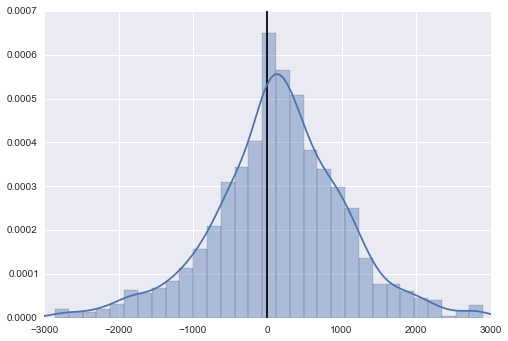

In [118]:
sns.distplot(diff_in_irpp[(diff_in_irpp<3000) & (diff_in_irpp>-3000)])
plt.xlim(-3000,3000)
plt.vlines(0,0,0.0007)

### Ceux qui switchent avec l'allocation optimale qui a changé

In [119]:
df_switchers = df_B[df_B.Same_family_did_not_change_allocation ==False].query("(Nb_enfants_2013>=1)&(Nb_enfants_2013==Nb_enfants_2014)" 
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)")

In [120]:
#Same result different definition
df_switchers = df_B.query("(Nb_enfants_2013>=1)&(Nb_enfants_2013==Nb_enfants_2014)" 
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)"
                    + "& (Chosen_allocation_2013 != Chosen_allocation_2014)"     )

In [121]:

df_non_switchers = df_B.query("(Nb_enfants_2013>=1)&(Nb_enfants_2013==Nb_enfants_2014)" 
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)"
                    + "& (Chosen_allocation_2013 == Chosen_allocation_2014)"     )

In [122]:
(df_switchers.Optimal_allocations_2013 == df_switchers.Optimal_allocations_2014).value_counts()

True     745
False    653
dtype: int64

In [123]:
#df_switchers = df_switchers[(df_switchers.Optimal_allocations_2013 != df_switchers.Optimal_allocations_2014)]

In [124]:
df_switchers[["Optimal_allocations_2013","Chosen_allocation_2013" , "Optimal_allocations_2014",
              "Chosen_allocation_2014", "Nb_enfants_2013", "Do_not_optimize_2013"]].head()

,Optimal_allocations_2013,Chosen_allocation_2013,Optimal_allocations_2014,Chosen_allocation_2014,Nb_enfants_2013,Do_not_optimize_2013
16,allocation_1,2,allocation_2,1,1,True
69,allocation_2,2,allocation_1,1,1,False
94,allocation_1,2,allocation_2,1,1,True
102,allocation_2,1,allocation_2,2,1,True
155,allocation_2,2,allocation_2,1,1,False


GOOD_ACTIVE_Switchers : Pas la même allocation que l'année dernière, mais change pour l'optimale  
Bad_swithcers :  Pas meme allocation que l'année dernière, mais changent pour une sous_optimale  
Very_bad_switechers :  Meme allocation que l'année dernière, optimisais, mais changent pour une sous_optimale  

Bad_Non_Switchers: Pas la même allocation que l'année dernière, devraient switcher
Very bad non switchers : Meme allocation que l'année dernière, devraient switcher

In [125]:
df_switchers.shape

(1398, 427)

In [126]:
#To_trash
df_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==False)").shape

(33, 427)

In [127]:
#To_trash
df_non_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==False) & (Do_not_optimize_2014==True)").shape

(1987, 427)

In [128]:
#Good_active_switchers
df_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==False) & (Do_not_optimize_2014==False)").shape

(504, 427)

In [129]:
#Bad_switchers
df_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==False) & (Do_not_optimize_2014==True)").shape

(23, 427)

In [130]:
# potential learner ?
df_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==False)").shape

(33, 427)

In [131]:
#Very_bad_switechers
df_switchers.query("(Optimal_allocations_2013 == Optimal_allocations_2014)& (Do_not_optimize_2013==False) & (Do_not_optimize_2014==True)").shape

(273, 427)

In [132]:
#Naive_switchers
df_switchers.query("(Optimal_allocations_2013 == Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==True)").shape

(40, 427)

In [133]:
#Naive_switchers
df_switchers.query("(Optimal_allocations_2013 == Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==True)").shape

(40, 427)

In [134]:
#Naive_switchers
df_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==True)").shape

(93, 427)

In [135]:
df_non_switchers = df_B[df_B.Same_family_did_not_change_allocation ==True].query("(Nb_enfants_2013>=1)&(Nb_enfants_2013==Nb_enfants_2014)" 
                    + "&(Number_of_optimal_allocations_2013 == 1)&(Number_of_optimal_allocations_2014 == 1)")

In [136]:
# Bad_Non_Switchers
df_non_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==False) & (Do_not_optimize_2014==True)").shape

(1987, 427)

In [137]:
# Very bad non switcher
df_non_switchers.query("(Optimal_allocations_2013 == Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==True)").shape

(4634, 427)

In [138]:
# Inerts (lucky or learners ?) 
df_non_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==False)").shape

(1883, 427)

In [139]:
df_non_switchers.query("(Optimal_allocations_2013 == Optimal_allocations_2014)& (Do_not_optimize_2013==False) & (Do_not_optimize_2014==False)").shape

(15220, 427)

In [140]:
df_non_switchers.query("(Optimal_allocations_2013 == Optimal_allocations_2014)& (Do_not_optimize_2013==True) & (Do_not_optimize_2014==False)").shape

(0, 427)

### Same with 1% threshold

In [141]:
#Good_active_switchers
df_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& " +
                   "(Do_not_optimize_1_prct_income_share_2013==False) & (Do_not_optimize_1_prct_income_share_2014==False)").shape

(595, 427)

In [142]:
#Bad_switchers
df_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& " +
                   "(Do_not_optimize_1_prct_income_share_2013==False) & (Do_not_optimize_1_prct_income_share_2014==True)").shape

(25, 427)

In [143]:
#Very_bad_switechers
df_switchers.query("(Optimal_allocations_2013 == Optimal_allocations_2014)& " +
                   "(Do_not_optimize_1_prct_income_share_2013==False) & (Do_not_optimize_1_prct_income_share_2014==True)").shape

(137, 427)

In [144]:
# Bad_Non_Switchers
df_non_switchers.query("(Optimal_allocations_2013 != Optimal_allocations_2014)& (Do_not_optimize_2013==False) & (Do_not_optimize_2014==True)").shape

(1987, 427)

# Regressions hypo learning

In [145]:
for df_temp in [df_A, df_B, df_C]:
    df_temp["Delta_perte_fiscale"] = df_temp.Fiscal_loss_2014 - df_temp.Fiscal_loss_2013
    df_temp["2_enfants"] = df_temp.Nb_enfants_2013 == 2
    df_temp["3_enfants_et_plus"] = df_temp.Nb_enfants_2013 >= 3 
    df_temp["Age_moyen"] = (df_temp.Age_mere_2013 + df_temp.Age_pere_2013)/2
    df_temp["Age_moyen_squared"] = df_temp.Age_moyen**2
    df_temp["Ecart_Age_en_valeur_absolue"] = np.abs(df_temp.Age_pere_2013 - df_temp.Age_mere_2013)
    
    df_temp["Diplome_femme"] = df_temp.Diplome_femme_2013
    df_temp["Diplome_homme"] = df_temp.Diplome_homme_2013
    
    df_temp["Family_change"] = df_temp.Nb_enfants_2013 != df_temp.Nb_enfants_2014
    df_temp["Family_child_gain"] = df_temp.Nb_enfants_2013 < df_temp.Nb_enfants_2014
    df_temp["Family_child_loss"] = df_temp.Nb_enfants_2013 > df_temp.Nb_enfants_2014

In [146]:
diploma_4_categories_2 = [dipl+"{}".format("_2013") for dipl in diploma_4_categories]

In [147]:
diploma_4_categories_2_to_regress =[
 'Vocational_education_femme_2013',
 'Licence_education_femme_2013',
 'Master_PhD_education_femme_2013',
 'Vocational_education_homme_2013',
 'Licence_education_homme_2013',
 'Master_PhD_education_homme_2013']

In [148]:
for df_temp in [df_A,df_B,df_C]: #TODO put in data preparation
        
    df_temp["Same_family"] = ((df_temp.Nb_enfants_2013 == df_temp.Nb_enfants_2014))
    
    df_temp["Same_family_same_allocation"] = ((df_temp.Nb_enfants_2013 == df_temp.Nb_enfants_2014)&
                              (df_temp.Allocation_mere_2013 == df_temp.Allocation_mere_2014))

In [149]:
df_B["Interact_not_same_allocation_do_not_optimize_2013"] = np.abs(df_B.Same_optimal_allocation_same_family-1) * df_B.Do_not_optimize_2013
df_B["Interact_same_allocation_do_optimize_2013"] = df_B.Same_optimal_allocation_same_family * np.abs(df_B.Do_not_optimize_2013-1)

In [150]:
df_B["Interact_same_allocation_do_optimize_2013"] = np.abs(df_B.Same_optimal_allocation_same_family) * np.abs(1-df_B.Do_not_optimize_2013)

In [151]:
df_A["Change_in_Rni"] = df_A.Rni_2014 - df_A.Rni_2013
df_B["Change_in_Rni"] = df_B.Rni_2014 - df_B.Rni_2013


In [152]:
df_B["Interact_learning"] = (np.abs(df_B.Same_optimal_allocation_same_family) 
                             * np.abs(df_B.Do_not_optimize_2013) 
                             * np.abs(df_B.Same_family_same_allocation - 1))
df_B["Interact_inertia"] = (  np.abs(df_B.Do_not_optimize_2013) 
                             * np.abs(df_B.Same_family_same_allocation)
                           *df_B.Same_optimal_allocation_same_family)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\pandas\computation\expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [153]:
same_family_different_allocation = ((df_B.Nb_enfants_2013 == df_B.Nb_enfants_2014)&
                              (df_B.Allocation_mere_2013 != df_B.Allocation_mere_2014))
df_B["Same_family_did_change_allocation"] = same_family_different_allocation.astype('int')

In [154]:
print df_B[df_B.Same_family==True].Same_optimal_allocation_same_family.astype("bool").value_counts()
print df_B[df_B.Same_family==True].Same_family_did_not_change_allocation.astype("bool").value_counts()

True     24045
False     4952
dtype: int64
True     27397
False     1600
dtype: int64


In [155]:
1549/4776 #part despersonnes ayant changé d'allocation allors que leur allocation optimale à changée.

0.32432998324958123

In [156]:
(df2013_B.Two_smallest_allocation_difference == 0).value_counts(normalize = True)

False    0.934806
True     0.065194
dtype: float64

#### Change in the family structure

In [157]:
"+".join(["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Change_in_Rni","Diff_in_incompe_mere_pere_2013",
                               "Fiscal_max_potential_loss_2014",
                               "Two_smallest_allocation_difference_2014",
                               "2_enfants", "3_enfants_et_plus",
                               "Family_child_gain",
                 'Intersect' ])

'Age_moyen+Age_moyen_squared+Ecart_Age_en_valeur_absolue+Rni_2013+Change_in_Rni+Diff_in_incompe_mere_pere_2013+Fiscal_max_potential_loss_2014+Two_smallest_allocation_difference_2014+2_enfants+3_enfants_et_plus+Family_child_gain+Intersect'

In [158]:
df_temp.columns.value_counts()

YBICI_2013                                                     1
Irpp_decote_seuil_prel_allocation_9_2014                       1
Irpp_decote_seuil_prel_allocation_4_2014                       1
Bac_pro_wo_2014                                                1
Irpp_decote_allocation_9_2013                                  1
Family_child_gain                                              1
Irpp_decote_allocation_9_2014                                  1
Bac_pro_wo_2013                                                1
Nb_enfants_2013                                                1
Irpp_decote_seuil_prel_allocation_8_2014                       1
year_2013                                                      1
Irpp_ac_plaf_qf_pacs                                           1
year_2014                                                      1
Ppe_2013                                                       1
YBICI_2014                                                     1
Ppe_2014                 

In [159]:
df_temp.Do_not_optimize_2014 = df_temp.Do_not_optimize_2014.astype("int")

In [160]:
for df_temp in [df_B]:#.query("Two_smallest_allocation_difference_2014!=0")]:
    print df_temp.shape
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp#[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.Probit(df_temp["Do_not_optimize_2014"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Change_in_Rni","Diff_in_incompe_mere_pere_2013",
                               "Fiscal_max_potential_loss_2014",
                               "Two_smallest_allocation_difference_2014",
                               "2_enfants", "3_enfants_et_plus",
                               "Family_child_gain",
                 'Intersect' ]#+diploma_4_categories_2_to_regress
                #+ ["Same_diploma_No_educ_2013","Same_diploma_Vocational_2013","Same_diploma_licence_2013","Same_diploma_Master_2013"]
                             ].astype("float")).fit()
    print OLS.summary()

(32272, 442)
Optimization terminated successfully.
         Current function value: 0.528304
         Iterations 6
                           Probit Regression Results                            
Dep. Variable:     Do_not_optimize_2014   No. Observations:                32272
Model:                           Probit   Df Residuals:                    32260
Method:                             MLE   Df Model:                           11
Date:                  Fri, 26 Apr 2019   Pseudo R-squ.:                 0.08658
Time:                          18:29:15   Log-Likelihood:                -17049.
converged:                         True   LL-Null:                       -18665.
                                          LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Age_moyen            

In [161]:
for df_temp in [df_B]:#.query("Two_smallest_allocation_difference_2014!=0")]:
    print df_temp.shape
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp#[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.Probit(df_temp["Do_not_optimize_1_prct_income_share_2014"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Change_in_Rni","Diff_in_incompe_mere_pere_2013",
                               "Fiscal_max_potential_loss_2014",
                               "Two_smallest_allocation_difference_2014",
                               "2_enfants", "3_enfants_et_plus","Do_not_optimize_1_prct_income_share_2013",
                               "Family_child_gain",
                 'Intersect', "Same_family_did_change_allocation"]#+diploma_4_categories_2_to_regress
                #+ ["Same_diploma_No_educ_2013","Same_diploma_Vocational_2013","Same_diploma_licence_2013","Same_diploma_Master_2013"]
                             ].astype("float")).fit()
    print OLS.summary()

(32272, 443)
Optimization terminated successfully.
         Current function value: 0.277219
         Iterations 7
                                     Probit Regression Results                                      
Dep. Variable:     Do_not_optimize_1_prct_income_share_2014   No. Observations:                32272
Model:                                               Probit   Df Residuals:                    32258
Method:                                                 MLE   Df Model:                           13
Date:                                      Fri, 26 Apr 2019   Pseudo R-squ.:                  0.2279
Time:                                              18:29:15   Log-Likelihood:                -8946.4
converged:                                             True   LL-Null:                       -11587.
                                                              LLR p-value:                     0.000
                                               coef    std err          z    

In [162]:
for df_temp in [df_B]:#.query("Two_smallest_allocation_difference_2014!=0")]:
    print df_temp.shape
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.Probit(df_temp["Do_not_optimize_2014"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Change_in_Rni","Diff_in_incompe_mere_pere_2013",
                               "Fiscal_max_potential_loss_2014",
                               "Two_smallest_allocation_difference_2014",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Do_not_optimize_2013","TC_2013",
                               "Family_child_gain","Interact_learning",
                               "Interact_not_same_allocation_do_not_optimize_2013","Interact_same_allocation_do_optimize_2013",
                 'Intersect', "Same_family_did_change_allocation" ]+diploma_4_categories_2_to_regress
                #+ ["Same_diploma_No_educ_2013","Same_diploma_Vocational_2013","Same_diploma_licence_2013","Same_diploma_Master_2013"]
                             ].astype("float")).fit()
    print OLS.summary()

(32272, 443)
Optimization terminated successfully.
         Current function value: 0.245345
         Iterations 7
                           Probit Regression Results                            
Dep. Variable:     Do_not_optimize_2014   No. Observations:                21895
Model:                           Probit   Df Residuals:                    21870
Method:                             MLE   Df Model:                           24
Date:                  Fri, 26 Apr 2019   Pseudo R-squ.:                  0.5783
Time:                          18:29:15   Log-Likelihood:                -5371.8
converged:                         True   LL-Null:                       -12739.
                                          LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------
A

### Full regression learning+ inertia+ etc

In [163]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.Probit(df_temp["Do_not_optimize_1_prct_income_share_2014"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Change_in_Rni","Diff_in_incompe_mere_pere_2013",
                               "Fiscal_max_potential_loss_2014",
                               "Two_smallest_allocation_difference_2014",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Do_not_optimize_2013","TC_2013",
                               "Family_child_gain","Interact_learning",
                               "Interact_not_same_allocation_do_not_optimize_2013","Interact_same_allocation_do_optimize_2013",
                 'Intersect', "Same_family_same_allocation" ]+diploma_4_categories_2_to_regress
                #+ ["Same_diploma_No_educ_2013","Same_diploma_Vocational_2013","Same_diploma_licence_2013","Same_diploma_Master_2013"]
                             ].astype("float")).fit()
    print OLS.summary()

(32272, 443)
Optimization terminated successfully.
         Current function value: 0.215940
         Iterations 8
                                     Probit Regression Results                                      
Dep. Variable:     Do_not_optimize_1_prct_income_share_2014   No. Observations:                21895
Model:                                               Probit   Df Residuals:                    21870
Method:                                                 MLE   Df Model:                           24
Date:                                      Fri, 26 Apr 2019   Pseudo R-squ.:                  0.3985
Time:                                              18:29:16   Log-Likelihood:                -4728.0
converged:                                             True   LL-Null:                       -7860.0
                                                              LLR p-value:                     0.000
                                                        coef    std err      

In [164]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.Probit(df_temp["Do_not_optimize_1_prct_income_share_2014"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Change_in_Rni","Diff_in_incompe_mere_pere_2013",
                               "Fiscal_max_potential_loss_2014",
                               "Two_smallest_allocation_difference_2014",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Do_not_optimize_2013","TC_2013",
                               'Same_family',"Interact_learning",
                               "Interact_not_same_allocation_do_not_optimize_2013","Interact_same_allocation_do_optimize_2013",
                 'Intersect', "Same_family_same_allocation" ]+diploma_4_categories_2_to_regress
                #+ ["Same_diploma_No_educ_2013","Same_diploma_Vocational_2013","Same_diploma_licence_2013","Same_diploma_Master_2013"]
                             ].astype("float")).fit()
    print OLS.summary()

(32272, 443)
Optimization terminated successfully.
         Current function value: 0.215039
         Iterations 8
                                     Probit Regression Results                                      
Dep. Variable:     Do_not_optimize_1_prct_income_share_2014   No. Observations:                21895
Model:                                               Probit   Df Residuals:                    21870
Method:                                                 MLE   Df Model:                           24
Date:                                      Fri, 26 Apr 2019   Pseudo R-squ.:                  0.4010
Time:                                              18:29:16   Log-Likelihood:                -4708.3
converged:                                             True   LL-Null:                       -7860.0
                                                              LLR p-value:                     0.000
                                                        coef    std err      

In [165]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.OLS(df_temp["Fiscal_loss_2014"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Change_in_Rni","Diff_in_incompe_mere_pere_2013",
                               "Fiscal_max_potential_loss_2014",
                               "Two_smallest_allocation_difference_2014",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Do_not_optimize_2013","TC_2013",
                               'Same_family',"Interact_learning",
                               "Interact_not_same_allocation_do_not_optimize_2013","Interact_same_allocation_do_optimize_2013",
                 'Intersect', "Same_family_same_allocation" ]+diploma_4_categories_2_to_regress
                #+ ["Same_diploma_No_educ_2013","Same_diploma_Vocational_2013","Same_diploma_licence_2013","Same_diploma_Master_2013"]
                             ].astype("float")).fit()
    print OLS.summary()

(32272, 443)
                            OLS Regression Results                            
Dep. Variable:       Fiscal_loss_2014   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     482.9
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:29:16   Log-Likelihood:            -1.5264e+05
No. Observations:               21895   AIC:                         3.053e+05
Df Residuals:                   21870   BIC:                         3.055e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------

In [166]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.OLS(df_temp["Delta_perte_fiscale"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Family_child_gain", "Family_child_loss", "TC_2013",
                 'Intersect' ]+diploma_4_categories_2].astype("float")).fit()
    print OLS.summary()

(32272, 443)
                             OLS Regression Results                            
Dep. Variable:     Delta_perte_fiscale   R-squared:                       0.012
Model:                             OLS   Adj. R-squared:                  0.011
Method:                  Least Squares   F-statistic:                     16.17
Date:                 Fri, 26 Apr 2019   Prob (F-statistic):           1.60e-45
Time:                         18:29:16   Log-Likelihood:            -1.5219e+05
No. Observations:                21895   AIC:                         3.044e+05
Df Residuals:                    21878   BIC:                         3.045e+05
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------

Perte fiscale > 0 en 2013

In [167]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp = df_temp.query("(Fiscal_loss_2013>0)")
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.OLS(df_temp["Delta_perte_fiscale"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Rni_2014",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Family_child_gain", "Family_child_loss","TC_2013",
                 'Intersect' ]+diploma_4_categories_2].astype("float")).fit()
    print OLS.summary()

(32272, 443)
                             OLS Regression Results                            
Dep. Variable:     Delta_perte_fiscale   R-squared:                       0.059
Model:                             OLS   Adj. R-squared:                  0.057
Method:                  Least Squares   F-statistic:                     23.19
Date:                 Fri, 26 Apr 2019   Prob (F-statistic):           7.49e-71
Time:                         18:29:16   Log-Likelihood:                -46128.
No. Observations:                 6269   AIC:                         9.229e+04
Df Residuals:                     6251   BIC:                         9.241e+04
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Perte fiscale >0 en 2013 et 2014 

In [168]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp = df_temp.query("(Fiscal_loss_2013>0)&(Fiscal_loss_2014>0)")
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    OLS = sm.OLS(df_temp["Delta_perte_fiscale"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Rni_2014",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Family_child_gain", "Family_child_loss","TC_2013",
                 'Intersect' ]+diploma_4_categories_2].astype("float")).fit()
    print OLS.summary()

(32272, 443)
                             OLS Regression Results                            
Dep. Variable:     Delta_perte_fiscale   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.028
Method:                  Least Squares   F-statistic:                     7.594
Date:                 Fri, 26 Apr 2019   Prob (F-statistic):           6.38e-19
Time:                         18:29:16   Log-Likelihood:                -28163.
No. Observations:                 3888   AIC:                         5.636e+04
Df Residuals:                     3870   BIC:                         5.647e+04
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------

Perte fiscale > 0 en 2014

In [169]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp = df_temp.query("(Fiscal_loss_2014>0)")
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    OLS = sm.OLS(df_temp["Delta_perte_fiscale"], 
                      df_temp[["Age_moyen", "Age_moyen_squared", "Ecart_Age_en_valeur_absolue","Rni_2013","Rni_2014",
                               "2_enfants", "3_enfants_et_plus","Same_optimal_allocation_same_family", 
                               "Family_child_gain", "Family_child_loss","TC_2013",
                 'Intersect' ]+diploma_4_categories_2].astype("float")).fit()
    print OLS.summary()

(32272, 443)
                             OLS Regression Results                            
Dep. Variable:     Delta_perte_fiscale   R-squared:                       0.072
Model:                             OLS   Adj. R-squared:                  0.069
Method:                  Least Squares   F-statistic:                     26.83
Date:                 Fri, 26 Apr 2019   Prob (F-statistic):           8.78e-83
Time:                         18:29:16   Log-Likelihood:                -42671.
No. Observations:                 5880   AIC:                         8.538e+04
Df Residuals:                     5862   BIC:                         8.550e+04
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------

### Regression hypo learning Olivier

In [170]:
df_B["Fiscal_max_potential_loss_2013"] = df_B.result_max_allocation_2013 - df_B.result_min_allocation_2013
hello_2013 = df_B.Fiscal_loss_2013/df_B.Fiscal_max_potential_loss_2013

df_B["Fiscal_max_potential_loss_2014"] = df_B.result_max_allocation_2014 - df_B.result_min_allocation_2014
hello_2014 = df_B.Fiscal_loss_2014/df_B.Fiscal_max_potential_loss_2014
df_B["Delta_hello"] = hello_2014-hello_2013

In [171]:
(df_B.query("Nb_enfants_2013==2").Fiscal_max_potential_loss_2014 == df_B.query("Nb_enfants_2013==2").Fiscal_loss_2014).value_counts()

False    12558
True      1114
dtype: int64

In [172]:
 "+Same_diploma_No_educ_2013+Same_diploma_Vocational_2013+Same_diploma_licence_2013+Same_diploma_Master_2013"

'+Same_diploma_No_educ_2013+Same_diploma_Vocational_2013+Same_diploma_licence_2013+Same_diploma_Master_2013'

In [173]:
df_B[df_B.Nb_enfants_2013 == df_B.Nb_enfants_2014].shape

(28997, 444)

In [174]:
df_B.Same_optimal_allocation_same_family.value_counts()

1     23001
0      8227
2       851
3       145
4        32
5        10
64        4
6         2
dtype: int64

In [175]:
df_B.Fiscal_max_potential_loss_2013.mean()

773.60264164755836

In [176]:
df_B.Fiscal_max_potential_loss_2014.mean()

955.74207176499749

In [177]:
df_B.Same_optimal_allocation_same_family.value_counts()

1     23001
0      8227
2       851
3       145
4        32
5        10
64        4
6         2
dtype: int64

In [178]:
df_B[df_B.Same_optimal_allocation_same_family.astype("bool")].Family_child_gain.value_counts(dropna = False)

False    24045
dtype: int64

In [179]:
for df_temp in [df_B]:
    print df_temp.shape
    df_temp = df_temp#.query("(Fiscal_loss_2014>0)")
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1
    df_temp = df_temp[df_temp[diploma_4_categories_2].sum(axis = 1) == 2]
    df_temp = df_temp.query("Same_optimal_allocation_same_family==True")
    OLS = sm.OLS(df_temp["Delta_hello"], 
                      df_temp[["Age_moyen_2013", "Age_moyen_squared_2013", "Ecart_Age_en_valeur_absolue_2013","Rni_2013","Rni_2014",
                               "deux_enfants_2013", "trois_enfants_et_plus_2013","Same_optimal_allocation_same_family", 
                               "Family_child_gain", "Family_child_loss",
                 'Intersect' ]+diploma_4_categories_2].astype("float")).fit()
    print OLS.summary()

(32272, 444)
                            OLS Regression Results                            
Dep. Variable:            Delta_hello   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.008
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.33e-06
Time:                        18:29:17   Log-Likelihood:                 4729.0
No. Observations:               15700   AIC:                            -9430.
Df Residuals:                   15686   BIC:                            -9323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------

In [180]:
stop_time = datetime.datetime.now(); print("now: ",stop_time);
execution_time = stop_time - start_time; print("execution_time: ",execution_time)
stop_time = start_time
#clear  memory
%reset -f

('now: ', datetime.datetime(2019, 4, 26, 18, 29, 17, 423000))
('execution_time: ', datetime.timedelta(0, 14, 457000))
